In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Looking At Longer TimeSeries
=======================================

The scripting interface has two interactive tools for looking at the 
TimeSeries generated in simulations. This tutorial shows an example of
their use, using a demo dataset for region time-series.

These are mainly of use for longer simulations, of at least a few seconds.

Setup
------

We'll load a few things we need from the "lab".

In [3]:
from tvb.simulator.lab import os, simulator, connectivity

Get the Demo Dataset
---------------------

We'll load the region demo dataset, computing it if necessary. We'll also specify 
the sample_period of the data in seconds rather than milliseconds, this will make 
the units for the power-spectrum we'll calculate below more natural...

**Note:** *If you haven't generated a region demo dataset already, the next cell 
will take a few minutes to calculate and store it for you... if you have then it 
should load almost instantly.*

In [4]:
# Figure out where we are so we can end up where we began...
where_we_started = os.path.abspath(os.path.curdir)

# A hacky way to get to the region demo data
sim_dir = os.path.dirname(simulator.__file__)
demo_dir = os.path.join(sim_dir, "demos")

os.chdir(demo_dir)

#Load or generate a demo dataset, and define a its sample period  in seconds (helpful for frequencies below)
if not os.path.isfile("demo_data_region_16s_2048Hz.npy"):
    %run "generate_region_demo_data.py"
    period = what_to_watch.period / 1000.0  #NOTE: Providing period in seconds
else:
    TAVG = load("demo_data_region_16s_2048Hz.npy")
    period = 0.00048828125 #NOTE: Providing period in seconds
    # Region demo data uses the default Connectivity, but we didn't bother storing it, so we'll regenerate it here.
    white_matter = connectivity.Connectivity(load_default=True)
    

# Time to go home...
os.chdir(where_we_started)

Create a TimeSeriesRegion Datatype
------------------------------------

Because we just stored our simulation as a simple array, we need to turn it into one of 
TVB's TimeSeries datatypes, which is what the two plotting tools operate on, in this case 
we'll use TimeSeriesRegion.

In [5]:
#Create a tvb TimeSeriesRegion datatype
import tvb.datatypes.time_series
white_matter.display_name = 'default'
tsr = tvb.datatypes.time_series.TimeSeriesRegion(data = TAVG, 
                                                 connectivity = white_matter,
                                                 sample_period = period, 
                                                 sample_period_unit = "s")
tsr.configure()

As our demo time-series is now a TVB-Datatype we can easily take a look at its summary info

In [6]:
tsr.summary_info

{'Dimensions': ['Time', 'State Variable', 'Region', 'Mode'],
 'Length': 16.0,
 'Region Mapping': 'None',
 'Region Mapping Volume': 'None',
 'Sample period': 0.00048828125,
 'Source Connectivity': 'default',
 'Time units': 's',
 'Time-series name': '',
 'Time-series type': 'TimeSeriesRegion'}

Create And Launch A TimeSeriesInteractive
------------------------------------------

Our typical approach throughout these tutorials has been to to simply plot our time-series 
using PyLab's plot() function. This is fine as a quick way to look at the small amounts of 
data we'd been producing, but is insufficient for longer, more meaningful, time-series, 
such as we get when trying to runs simulations aimed at generating time-series comparable 
to experimental data. 

TimeSeriesInteractive is a tool for looking at these longer time-series. It's still 
relatively simple, but it adds a number of useful features. The time-series are plotted
in the main central panel with a constant vertical offset, the label for each channel or
region displayed down the left hand side. Along the bottom are three basic controls:
on the left there is a slider that allows the length of the window to be changed (in 
physical units); in the middle a set of buttons exist to step forward and backward 
through the time-series at different speeds (at the top of the window there is an 
indicator showing where you are in the time-series); and on the right the vertical 
spacing, or offset between time series can be set, this has the effect of scaling the 
time-series' amplitudes.

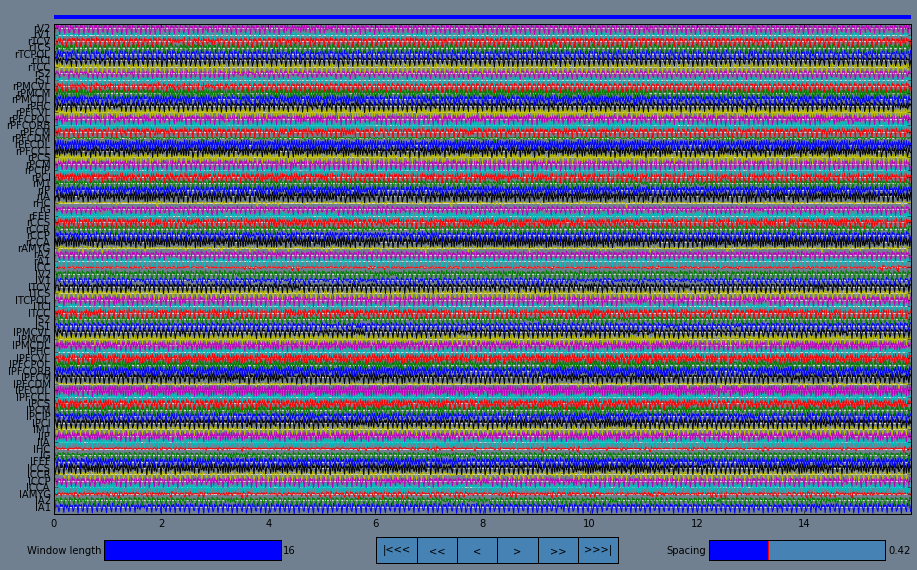

In [7]:
#Create and launch the interactive visualiser
import tvb.simulator.plot.timeseries_interactive as ts_int
tsi = ts_int.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()

Create And Launch A PowerSpectraInteractive
---------------------------------------------

A similar plotting tool, called PowerSpectraInteractive, exists for displaying power-spectra of 
a TimeSeries. A range of basic options exist within the PowerSpectraInteractive window: the x and
y axes can be toggled between logarithmic and linear scaling; the segment length used for the FFT
can be selected from a range of values; a windowing function can optionally be applied prior to 
the FFT; the area under the power-spectra can be normalised; and if a region time-series including 
multiple state-variables or modes is passed in, then these can be selected. 

Let's take a look:

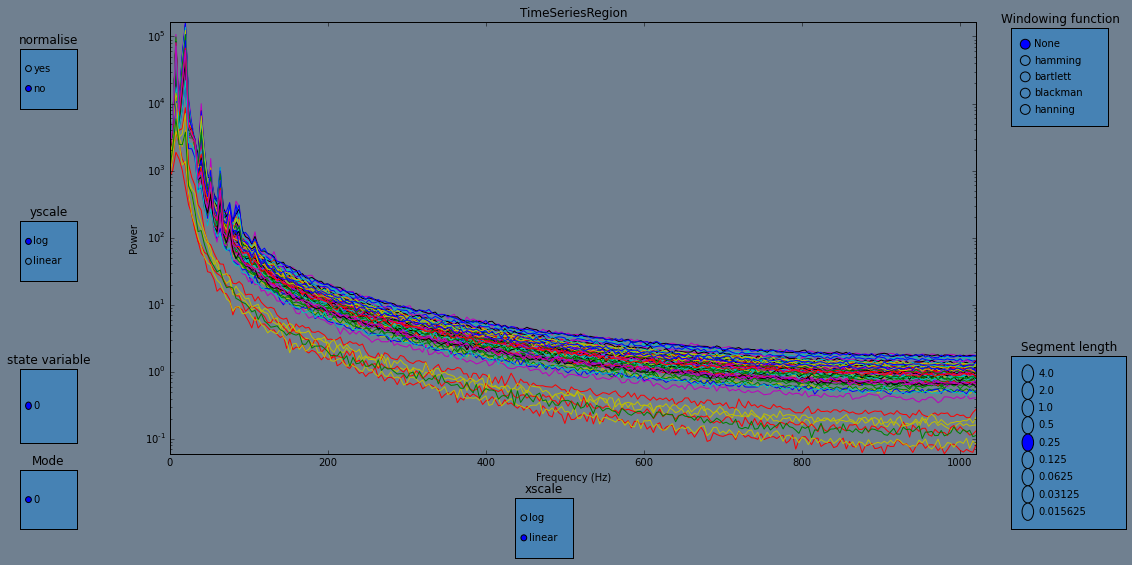

In [8]:
#Create and launch the interactive visualiser
import tvb.simulator.plot.power_spectra_interactive as ps_int
psi = ps_int.PowerSpectraInteractive(time_series=tsr)
psi.show()

That's All Folks... so, what's next?
-------------------------------------

This was a very short tutorial, just intended to make you aware of a couple of basic tools 
for looking at longer time-series in TVB. So when you start running longer simulations you 
now how to quickly take a look at their basic temporal and spectral properties.

The next Tutorial, Looking At Long EEG TimeSeries is similar, but we will have a look at EEG time-series from a surface simulation.